# Análise de Dados

### Importando as bibliotecas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from io import BytesIO
import requests


Importamos todas a bibliotecas necessárias para as análises  

# Dataframe dos Usuários

## Juntando os arquivos dos dataframes

In [2]:
diretorio = "./DataFrames/Usuários"
arquivos = [arquivo for arquivo in os.listdir(diretorio) if not arquivo.startswith('.')] #Ignora arquivos escondidos

df_usuarios = pd.DataFrame()

for arquivo in arquivos:
    data_atual = pd.read_csv(diretorio+"/"+arquivo)
    data_atual['usuário'] = arquivo[:-4]
    df_usuarios = pd.concat([df_usuarios, data_atual])

In [3]:
df_usuarios

,Unnamed: 0,track_id,track_name,artist_name,artist_genres,album_name,artist_id,popularity,duration_ms,explicit,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_img,usuário
0,0,7wdwIaXUuzlu1grzWMFRJm,Mary On A Cross,Ghost,"['hard rock', 'metal']",[MESSAGE FROM THE CLERGY],1Qp56T7n950O3EGMsSl81D,77,244804,False,...,1,0.0451,0.000187,0.000493,0.1050,0.554,130.027,4,https://i.scdn.co/image/ab67616d00001e02f7dbc5...,Anne
1,1,6I3mqTwhRpn34SLVafSH7G,Ghost,Justin Bieber,"['canadian pop', 'pop']",Justice,1uNFoZAHBGtllmzznpCI3s,89,153190,False,...,1,0.0478,0.185000,0.000029,0.4150,0.441,153.960,4,https://i.scdn.co/image/ab67616d00001e02e6f407...,Anne
2,2,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,['pop'],Plastic Hearts,5YGY8feqx7naU7z4HrwZM6,94,196453,False,...,1,0.0313,0.098100,0.000000,0.1000,0.494,121.981,4,https://i.scdn.co/image/ab67616d00001e028cffb7...,Anne
3,3,6jugu0rJWQUxwP6YekuYh7,Miley Cyrus,Ying Yang Twins,"['atl hip hop', 'crunk', 'dirty south rap', 'o...",Twerking Hitz,44PA0rCQXikgOWbfY7Fq7m,0,216659,False,...,0,0.0781,0.007310,0.000182,0.2180,0.402,98.060,4,https://i.scdn.co/image/ab67616d00001e02682ec1...,Anne
4,4,66tHO11PSLP7u25A6XM4iR,"Love, Love",Cedarmont Kids,['vbs'],Songs Of Praise,0MCU2OpgnSB7rm5UPUMHgt,8,142960,False,...,0,0.0310,0.898000,0.000000,0.0794,0.491,129.640,4,https://i.scdn.co/image/ab67616d00001e0221fd70...,Anne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,7bEKga8eFygrhFWB5KTl3A,Hmmm,Hott Headzz,['chicago rap'],Hmmm - Single,47hkgwnnlluE8suPZiPclc,67,172248,True,...,1,0.2690,0.039800,0.000003,0.1080,0.563,140.102,4,https://i.scdn.co/image/ab67616d00001e02a9cbe6...,VitorSolla
16,16,7MIhUdNJtaOnDmC5nBC1fb,Deep Down (feat. Never Dull),Alok,"['electro house', 'pop nacional', 'sertanejo u...",Deep Down (feat. Never Dull),0NGAZxHanS9e0iNHpR8f2W,84,165752,False,...,1,0.0778,0.011200,0.000000,0.2480,0.886,125.952,4,https://i.scdn.co/image/ab67616d00001e02ed443f...,VitorSolla
17,17,2LCGFBu1ej6zt4r1VGPjny,GONE,NF,"['hip hop', 'pop rap']",HOPE,6fOMl44jA4Sp5b9PpYCkzz,74,246118,False,...,1,0.0408,0.515000,0.000000,0.0995,0.458,80.088,4,https://i.scdn.co/image/ab67616d00001e02ff8a42...,VitorSolla
18,18,7FET9gtiECWn7llt0sfvtU,CAREFUL,NF,"['hip hop', 'pop rap']",HOPE,6fOMl44jA4Sp5b9PpYCkzz,77,209500,False,...,0,0.0591,0.067100,0.000000,0.3730,0.344,130.024,4,https://i.scdn.co/image/ab67616d00001e02ff8a42...,VitorSolla


## Tratando o dataframe

### Excluindo a coluna "Unnamed: 0"

In [4]:
df_usuarios = df_usuarios.drop("Unnamed: 0", axis=1)
df_usuarios.head()

,track_id,track_name,artist_name,artist_genres,album_name,artist_id,popularity,duration_ms,explicit,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_img,usuário
0,7wdwIaXUuzlu1grzWMFRJm,Mary On A Cross,Ghost,"['hard rock', 'metal']",[MESSAGE FROM THE CLERGY],1Qp56T7n950O3EGMsSl81D,77,244804,False,0.467,...,1,0.0451,0.000187,0.000493,0.1050,0.554,130.027,4,https://i.scdn.co/image/ab67616d00001e02f7dbc5...,Anne
1,6I3mqTwhRpn34SLVafSH7G,Ghost,Justin Bieber,"['canadian pop', 'pop']",Justice,1uNFoZAHBGtllmzznpCI3s,89,153190,False,0.601,...,1,0.0478,0.185000,0.000029,0.4150,0.441,153.960,4,https://i.scdn.co/image/ab67616d00001e02e6f407...,Anne
2,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,['pop'],Plastic Hearts,5YGY8feqx7naU7z4HrwZM6,94,196453,False,0.672,...,1,0.0313,0.098100,0.000000,0.1000,0.494,121.981,4,https://i.scdn.co/image/ab67616d00001e028cffb7...,Anne
3,6jugu0rJWQUxwP6YekuYh7,Miley Cyrus,Ying Yang Twins,"['atl hip hop', 'crunk', 'dirty south rap', 'o...",Twerking Hitz,44PA0rCQXikgOWbfY7Fq7m,0,216659,False,0.762,...,0,0.0781,0.007310,0.000182,0.2180,0.402,98.060,4,https://i.scdn.co/image/ab67616d00001e02682ec1...,Anne
4,66tHO11PSLP7u25A6XM4iR,"Love, Love",Cedarmont Kids,['vbs'],Songs Of Praise,0MCU2OpgnSB7rm5UPUMHgt,8,142960,False,0.577,...,0,0.0310,0.898000,0.000000,0.0794,0.491,129.640,4,https://i.scdn.co/image/ab67616d00001e0221fd70...,Anne


### Renomeando as colunas para português

In [5]:
df_usuarios.columns

Index(['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_name',
       'artist_id', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'album_img', 'usuário'],
      dtype='object')

In [6]:
df_usuarios.rename(columns={'track_id': 'id_da_faixa',
                        'track_name': 'nome_da_faixa',
                        'artist_name': 'nome_do_artista',
                        'artist_genres': 'generos_do_artista',
                        'album_name': 'nome_do_album',
                        'artist_id': 'id_do_artista',
                        'popularity': 'popularidade',
                        'duration_ms': 'duracao_ms',
                        'explicit': 'explicita',
                        'danceability': 'danceabilidade ',
                        'energy': 'energia',
                        'key': 'tonalidade',
                        'loudness': 'volume',
                        'mode': 'modalidade',
                        'speechiness': 'fala',
                        'acousticness': 'acusticidade',
                        'instrumentalness': 'instrumentalidade',
                        'liveness': 'aovivo',
                        'valence': 'positividade',
                        'tempo': 'tempo',
                        'time_signature': 'assinatura_tempo'}, inplace=True)


### Gêneros mais escutados

In [7]:
#Copiando o dataframe
df_generos_usuarios = df_usuarios

#Separando os Gêneros
df_generos_usuarios['generos'] = df_generos_usuarios['generos_do_artista'].str.strip('[]').str.split(',')

#Criando linhas indivíduais para cada gênero
df_generos_usuarios_separado = df_generos_usuarios.explode('generos')

In [8]:
#Contando a aparição dos gêneros
df_generos_usuarios_separado['generos'].value_counts()

 'sertanejo universitario'    76
                              69
'agronejo'                    65
 'pop'                        61
 'sertanejo'                  43
                              ..
 'sleep'                       1
'early romantic era'           1
 'german romanticism'          1
 'violin'                      1
'dark r&b'                     1
Name: generos, Length: 426, dtype: int64

---------------------------------------------------------------------

# Parte de recomendação

Bibliotecas utilizadas

In [9]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

# Rodar os códigos até aqui para limpar!

------------------------------------------------------------------

Pegamos apenas os valores numéricos e fizemos uma média de todos os usuários com nome igual 
para ter apenas uma linha de cada usuário com os dados sendo uma média das músicas executadas por ele, 
gerando um status exclusivo para cada um.

Transformamos a coluna explicita de booleana (true ou false) para (1 ou 0)

In [38]:
# Colunas a ser convertida
categorical_columns = ['explicita']

# Codificação de rótulos
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_usuarios[column] = label_encoder.fit_transform(df_usuarios[column])

Para fazer a média dos valores das músicas dos usuários, tiramos tudo que não for numérico, como nome da faixa, nome do artista, etc..

In [11]:
# Selecionar apenas as colunas relevantes
columns = ['popularidade', 'duracao_ms', 'explicita',
           'modalidade', 'fala', 'acusticidade', 'instrumentalidade', 'aovivo',
           'positividade', 'tempo', 'assinatura_tempo', 'usuário']
df_relevantes = df_usuarios[columns]

Apenas os valores numéricos

In [12]:
df_relevantes.head()

,popularidade,duracao_ms,explicita,modalidade,fala,acusticidade,instrumentalidade,aovivo,positividade,tempo,assinatura_tempo,usuário
0,77,244804,0,1,0.0451,0.000187,0.000493,0.1050,0.554,130.027,4,Anne
1,89,153190,0,1,0.0478,0.185000,0.000029,0.4150,0.441,153.960,4,Anne
2,94,196453,0,1,0.0313,0.098100,0.000000,0.1000,0.494,121.981,4,Anne
3,0,216659,0,0,0.0781,0.007310,0.000182,0.2180,0.402,98.060,4,Anne
4,8,142960,0,0,0.0310,0.898000,0.000000,0.0794,0.491,129.640,4,Anne


Aqui agrupamos por usuário e realizamos a média

In [13]:
# Calcular a média das colunas para cada usuário
df_usuarios_media = df_relevantes.groupby('usuário').mean()

#### Podemos ver que agora temos apenas um usuário de cada com uma média dos seus gostos

In [14]:
df_usuarios_media.head()

,popularidade,duracao_ms,explicita,modalidade,fala,acusticidade,instrumentalidade,aovivo,positividade,tempo,assinatura_tempo
usuário,,,,,,,,,,,
Anne,49.75,203348.40,0.05,0.75,0.059850,0.355385,0.057185,0.208040,0.495950,124.94985,3.90
Antonio,42.35,207537.05,0.15,0.60,0.063170,0.244122,0.139657,0.216475,0.565000,124.25175,4.05
Antonio2,38.15,219017.45,0.10,0.60,0.101450,0.302018,0.126816,0.190335,0.474285,126.85020,4.05
Caio,68.10,205224.75,0.15,0.50,0.151845,0.250630,0.000062,0.153695,0.552800,124.07170,4.05
CaioV,38.95,226138.30,0.25,0.70,0.086305,0.385835,0.178851,0.268410,0.443225,127.65485,4.10


## Análise dos Usuários

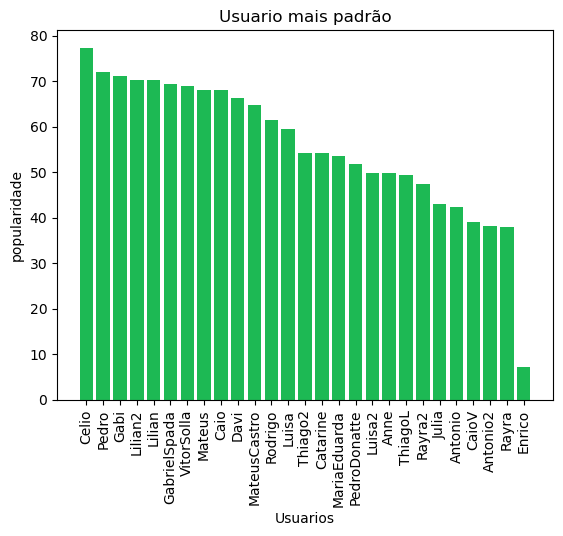

In [15]:
mais_modinha = df_usuarios_media.groupby('usuário')['popularidade'].mean().nlargest(27)

plt.bar(mais_modinha.index, mais_modinha.values, color='#1DB954')

plt.title('Usuario mais padrão')
plt.xlabel('Usuarios')
plt.ylabel('popularidade')
plt.xticks(rotation=90)

plt.show()

Enrico escuta apenas músicas clássicas então nessa análise pode se considerado um outlier

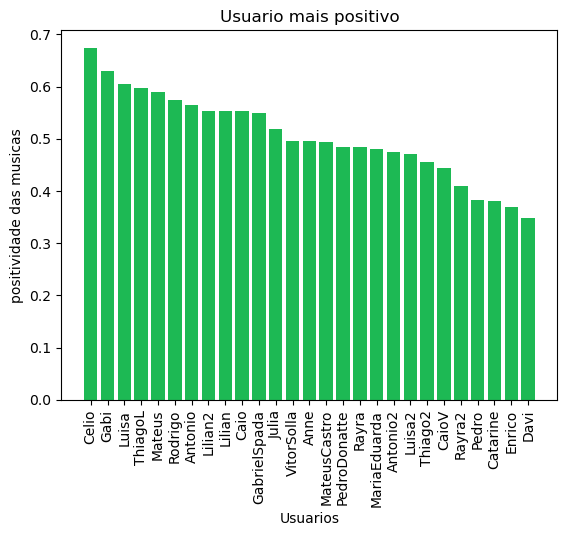

In [16]:
mais_positivo = df_usuarios_media.groupby('usuário')['positividade'].mean().nlargest(27)

plt.bar(mais_positivo.index, mais_positivo.values, color='#1DB954')

plt.title('Usuario mais positivo')
plt.xlabel('Usuarios')
plt.ylabel('positividade das musicas')
plt.xticks(rotation=90)

plt.show()

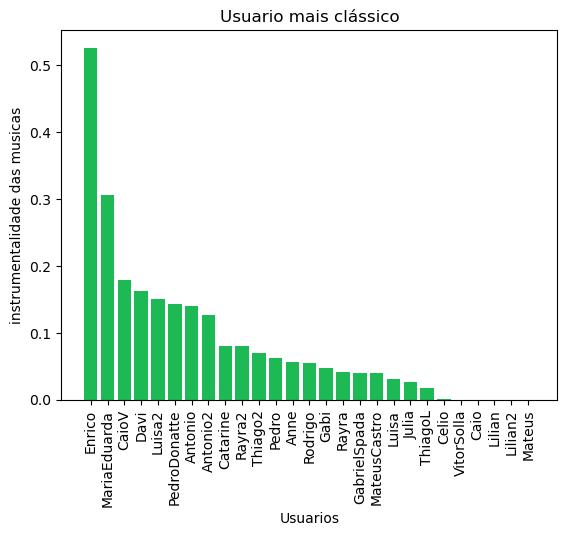

In [24]:
mais_instrumental = df_usuarios_media.groupby('usuário')['instrumentalidade'].mean().nlargest(27)

plt.bar(mais_instrumental.index, mais_instrumental.values, color='#1DB954')

plt.title('Usuario mais clássico')
plt.xlabel('Usuarios')
plt.ylabel('instrumentalidade das musicas')
plt.xticks(rotation=90)

plt.show()

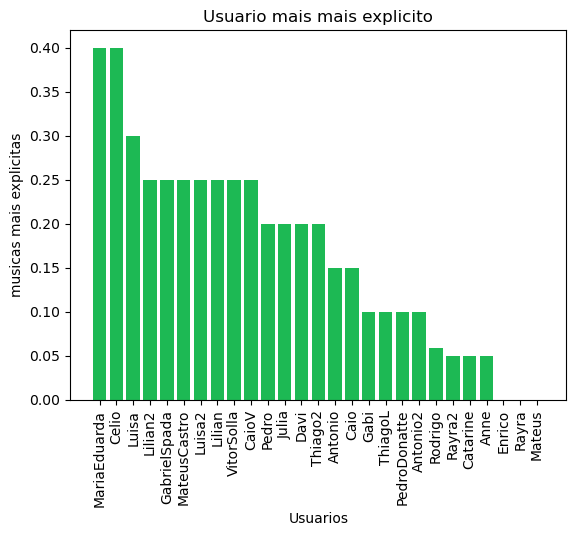

In [27]:
mais_explicito = df_usuarios_media.groupby('usuário')['explicita'].mean().nlargest(27)

plt.bar(mais_explicito.index, mais_explicito.values, color='#1DB954')

plt.title('Usuario mais mais explicito')
plt.xlabel('Usuarios')
plt.ylabel('musicas mais explicitas')
plt.xticks(rotation=90)

plt.show()

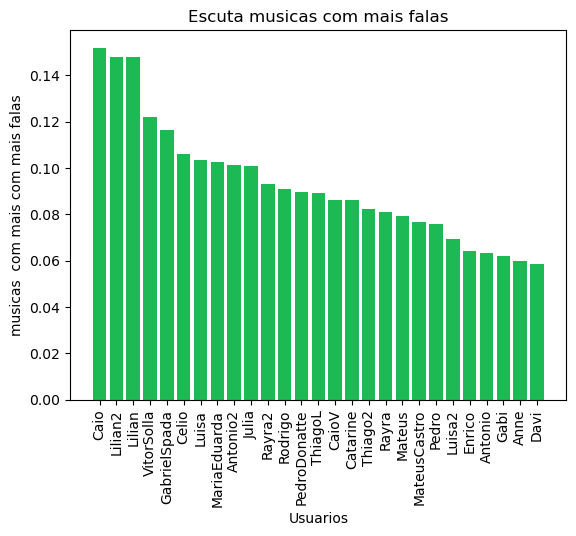

In [29]:
mais_fala = df_usuarios_media.groupby('usuário')['fala'].mean().nlargest(27)

plt.bar(mais_fala.index, mais_fala.values, color='#1DB954')

plt.title('Escuta musicas com mais falas')
plt.xlabel('Usuarios')
plt.ylabel('musicas  com mais com mais falas')
plt.xticks(rotation=90)

plt.show()

## KNN

In [30]:
df_usuarios_normalized = (df_usuarios_media - df_usuarios_media.mean()) / df_usuarios_media.std()

Normalizamos os dados para utilizar o Knn

In [31]:
df_usuarios_normalized.head()

,popularidade,duracao_ms,explicita,modalidade,fala,acusticidade,instrumentalidade,aovivo,positividade,tempo,assinatura_tempo
usuário,,,,,,,,,,,
Anne,-0.389825,-0.239032,-1.048999,1.457185,-1.257010,0.343118,-0.275524,-0.403397,-0.107879,0.300867,-0.272709
Antonio,-0.872438,-0.152656,-0.166340,0.153952,-1.130772,-0.417344,0.452370,-0.325607,0.721833,0.195747,0.832846
Antonio2,-1.146353,0.084085,-0.607669,0.153952,0.324759,-0.021631,0.339041,-0.566677,-0.368208,0.587022,0.832846
Caio,0.806924,-0.200339,-0.166340,-0.714870,2.240942,-0.372862,-0.779696,-0.904580,0.575237,0.168635,0.832846
CaioV,-1.094179,0.230927,0.716319,1.022774,-0.251104,0.551241,0.798301,0.153350,-0.741428,0.708186,1.201364


Algoritmo KNN

In [32]:
# Aplicar o algoritmo KNN
k = 4  # Número de grupos desejados
knn = NearestNeighbors(n_neighbors=k)
knn.fit(df_usuarios_normalized)

NearestNeighbors(n_neighbors=4)

In [33]:
# Encontrar os k vizinhos mais próximos para cada usuário
distances, indices = knn.kneighbors(df_usuarios_normalized)

In [34]:
# Criar dicionário para armazenar os grupos
groups = {}
for i in range(k):
    groups[i] = []

# Atribuir cada usuário ao seu respectivo grupo
for i in range(len(df_usuarios_media)):
    for j in range(k):
        if i in indices[j]:
            groups[j].append(df_usuarios_media.index[i])
            break

# Imprimir os usuários em cada grupo
for group, users in groups.items():
    print(f"Grupo {group + 1}:")
    for user in users:
        print(user)
    print()

Grupo 1:
Anne
Antonio
PedroDonatte
Rayra

Grupo 2:
Antonio2
Julia
Thiago2

Grupo 3:
CaioV

Grupo 4:
Caio
GabrielSpada
Lilian
Lilian2

